In [65]:
# a. Load required libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers #d Answer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [66]:
# b. Load Test and Train data (Assuming you have loaded and preprocessed the data)
# Replace train_data and test_data with your actual datasets
train_data_dir ="/content/drive/MyDrive/vechicles_q1_dataset/train"
test_data_dir = "/content/drive/MyDrive/vechicles_q1_dataset/test"

In [67]:
file_list = os.listdir(train_data_dir)
print(file_list)

['bike', 'scooty', 'boat', 'plane', 'bus', 'truck', 'helicopter', 'cycle', 'car']


In [68]:
# Set the image size and batch size
image_size = (32, 32)
batch_size = 32

In [69]:
# Create the ImageDataGenerator objects for train and test data
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Load and preprocess the train data
train_data = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


# Get the train labels from the train data generator
train_labels = train_data.classes

test_labels=test_data.classes

Found 468 images belonging to 9 classes.
Found 72 images belonging to 9 classes.


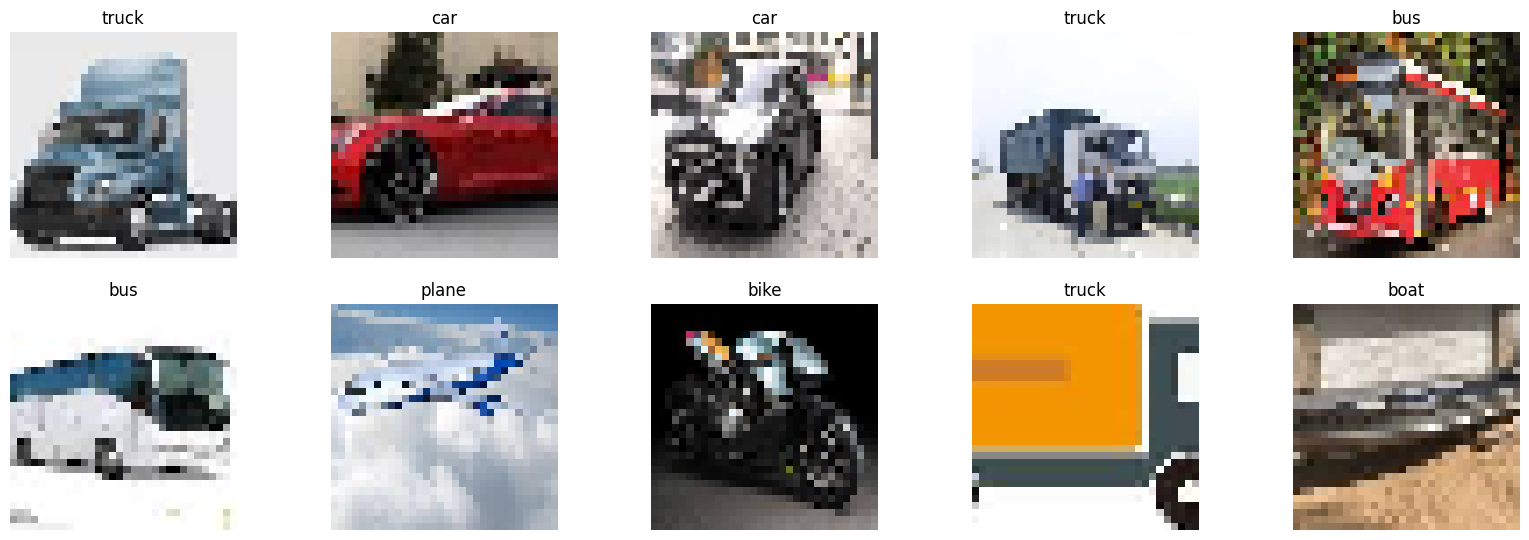

In [93]:
# c. Visualize the dataset, plot 10 images from the dataset
class_names = train_data.class_indices
plt.figure(figsize=(20, 10))
for i in range(10):
    image, label = train_data[i]
    plt.subplot(3, 5, i + 1)
    plt.imshow(image[0])
    plt.title(list(class_names.keys())[np.argmax(label[0])])
    plt.axis('off')
plt.show()

In [71]:
#e.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [72]:
# f. Compile the model after configuring the optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
#g.Model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [84]:
#h. Train the model
epochs = 10  # Adjust the number of training epochs
history = model.fit(train_data, epochs=epochs, validation_data=test_data)



Epoch 1/10
15/15 [==============================] - 1s 71ms/step - loss: 0.3092 - accuracy: 0.9338 - val_loss: 1.8366 - val_accuracy: 0.4583
Epoch 2/10
15/15 [==============================] - 1s 68ms/step - loss: 0.2756 - accuracy: 0.9444 - val_loss: 2.0683 - val_accuracy: 0.4583
Epoch 3/10
15/15 [==============================] - 1s 64ms/step - loss: 0.2669 - accuracy: 0.9530 - val_loss: 1.8974 - val_accuracy: 0.4861
Epoch 4/10
15/15 [==============================] - 1s 69ms/step - loss: 0.2586 - accuracy: 0.9530 - val_loss: 2.1371 - val_accuracy: 0.4861
Epoch 5/10
15/15 [==============================] - 1s 71ms/step - loss: 0.2595 - accuracy: 0.9487 - val_loss: 2.2054 - val_accuracy: 0.4444
Epoch 6/10
15/15 [==============================] - 1s 89ms/step - loss: 0.2728 - accuracy: 0.9316 - val_loss: 2.0197 - val_accuracy: 0.4583
Epoch 7/10
15/15 [==============================] - 1s 68ms/step - loss: 0.2174 - accuracy: 0.9744 - val_loss: 2.2045 - val_accuracy: 0.4306
Epoch 8/10
15

In [75]:

#i. Calculate model accuracy using testing data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


3/3 [==============================] - 0s 34ms/step - loss: 2.2080 - accuracy: 0.0833
Test loss: 2.208042621612549
Test accuracy: 0.0833333358168602


In [83]:

#j.Load and preprocess the new image using OpenCV
new_data_path = "/content/drive/MyDrive/vechicles_q1_dataset/test/car/Z (8).jpg"

# Load the image using OpenCV
img = cv2.imread(new_data_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format if needed
img = cv2.resize(img, (32, 32))  # Resize to match your model's input size
img = img / 255.0  # Normalize the image data to [0, 1]

# Reshape the image to match the expected input shape
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# If you have a list of class labels, you can map the index to a label
class_labels = ['bike', 'scooty', 'boat', 'plane', 'bus', 'truck', 'helicopter', 'cycle', 'car']
predicted_class_label = class_labels[predicted_class_index[0]]
# Print the predicted class label
print(f'Predicted class label: {predicted_class_label}')
# 'predicted_class_label' will contain the predicted class label for the new image.


1/1 [==============================] - 0s 14ms/step
Predicted class label: car
